# Supervised Learning Based Plant Species Classification for Precise              E-Agriculture 

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from skimage import io, transform
from sklearn import preprocessing
import numpy as np
import joblib
import cv2

In [2]:
path = r"dataset"
model_folder = "model"
categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
categories


['Arjuna', 'Chinar', 'Gauva', 'Jatropha']

In [3]:
X_file = os.path.join(model_folder, "X.txt.npy")
Y_file = os.path.join(model_folder, "Y.txt.npy")
if os.path.exists(X_file) and os.path.exists(Y_file):
    X = np.load(X_file)
    Y = np.load(Y_file)
    print("X and Y arrays loaded successfully.")
else:
    X = [] # input array
    Y = [] # output array
    for root, dirs, directory in os.walk(path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            print(f'Loading category: {dirs}')
            print(name+" "+root+"/"+directory[j])
            if 'Thumbs.db' not in directory[j]:
                img_array = cv2.imread(root+"/"+directory[j])
                img_resized = resize(img_array, (64, 64, 3))
                # Append the input image array to X
                X.append(img_resized.flatten())
                # Append the index of the category in categories list to Y
                Y.append(categories.index(name))
    X = np.array(X)
    
    np.save(X_file, X)
    np.save(Y_file, Y)

X and Y arrays loaded successfully.


In [4]:
df = pd.DataFrame(X)
df['Y'] = Y
df

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Y
0,0.138372,0.122686,0.103078,0.141087,0.125401,0.105793,0.143759,0.128073,0.108465,0.151762,...,0.085386,0.085386,0.085386,0.080783,0.080783,0.080783,0.077127,0.077127,0.077127,0
1,0.142195,0.126509,0.106901,0.144410,0.128723,0.109116,0.149529,0.133843,0.114235,0.153754,...,0.099103,0.087488,0.089406,0.098263,0.084561,0.086810,0.100821,0.085803,0.088273,0
2,0.139831,0.124145,0.104537,0.141140,0.125454,0.105846,0.143259,0.127573,0.107965,0.151491,...,0.091490,0.085496,0.086484,0.097262,0.082225,0.084716,0.082824,0.078926,0.079560,0
3,0.137415,0.121728,0.102121,0.141487,0.125801,0.106193,0.143055,0.127369,0.107761,0.144077,...,0.084454,0.084454,0.084454,0.080227,0.080227,0.080227,0.077670,0.077670,0.077670,0
4,0.145480,0.129794,0.110186,0.150626,0.134940,0.115332,0.152354,0.136668,0.117060,0.154301,...,0.081966,0.081966,0.081966,0.080523,0.080523,0.080523,0.076113,0.076113,0.076113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,0.239902,0.204607,0.153628,0.242512,0.207204,0.156264,0.242916,0.206425,0.158940,0.241477,...,0.082443,0.082443,0.082443,0.076379,0.076379,0.076379,0.074650,0.074650,0.074650,3
692,0.208344,0.162686,0.146822,0.228192,0.181317,0.165161,0.245848,0.201463,0.177431,0.249283,...,0.078700,0.078700,0.078700,0.075157,0.075157,0.075157,0.074516,0.074516,0.074516,3
693,0.125050,0.109364,0.089756,0.127951,0.112265,0.092657,0.130275,0.114589,0.094981,0.136061,...,0.095821,0.072293,0.076215,0.094392,0.070922,0.074833,0.093322,0.070843,0.074584,3
694,0.099465,0.099465,0.099465,0.101397,0.101397,0.101397,0.101776,0.101776,0.101776,0.102856,...,0.105723,0.082194,0.086115,0.104338,0.080809,0.084730,0.101260,0.077731,0.081653,3


In [5]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=44)

In [6]:
labels=categories

In [7]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [8]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# ETC Classifier

Extra Trees Classifier Accuracy    : 91.39344262295081
Extra Trees Classifier Precision   : 91.8784943696354
Extra Trees Classifier Recall      : 86.45146041697765
Extra Trees Classifier FSCORE      : 87.57977015921931

 Extra Trees Classifier classification report
               precision    recall  f1-score   support

      Arjuna       0.99      0.92      0.95        83
      Chinar       0.57      1.00      0.73        20
       Gauva       0.99      0.96      0.97        90
    Jatropha       0.91      0.80      0.85        51

    accuracy                           0.91       244
   macro avg       0.86      0.92      0.88       244
weighted avg       0.94      0.91      0.92       244



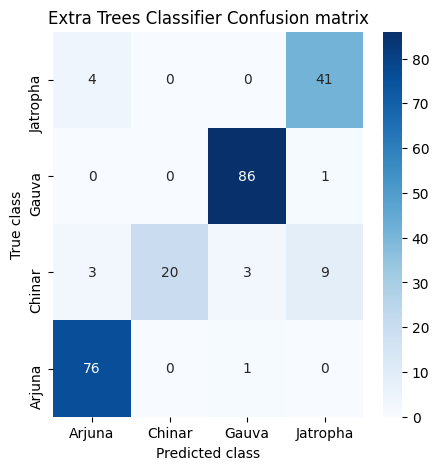

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
Model_file = os.path.join(model_folder, "ETC_Model.pkl")
if os.path.exists(Model_file):
    # Load the model from the pkl file
    etc_classifier = joblib.load(Model_file)
    predict = etc_classifier.predict(x_test)
    calculateMetrics("Extra Trees Classifier", predict, y_test)
else:
    etc_classifier = ExtraTreesClassifier()
    etc_classifier.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(etc_classifier, Model_file)  
    predict = etc_classifier.predict(x_test)
    print("ETC trained and model weights saved.")
    calculateMetrics("Extra Trees Classifier", predict, y_test)
    

# XGBoost Classifier

XGBoost Classifier Accuracy    : 92.21311475409836
XGBoost Classifier Precision   : 92.52034277041128
XGBoost Classifier Recall      : 87.72130168681893
XGBoost Classifier FSCORE      : 88.73067378708305

 XGBoost Classifier classification report
               precision    recall  f1-score   support

      Arjuna       0.99      0.93      0.96        82
      Chinar       0.60      1.00      0.75        21
       Gauva       0.99      0.97      0.98        89
    Jatropha       0.93      0.81      0.87        52

    accuracy                           0.92       244
   macro avg       0.88      0.93      0.89       244
weighted avg       0.94      0.92      0.93       244



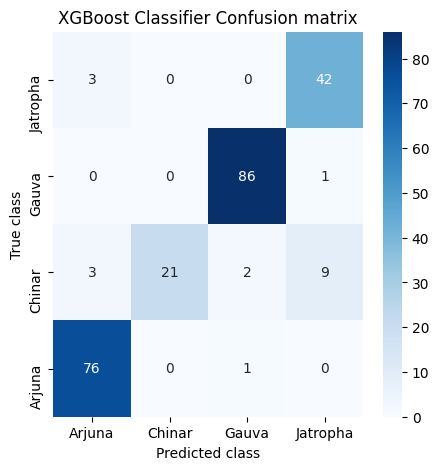

In [10]:
from xgboost import XGBClassifier

Model_file = os.path.join(model_folder, "XGB_Model.pkl")
if os.path.exists(Model_file):
    # Load the model from the pkl file
    xgb_classifier = joblib.load(Model_file)
    predict = xgb_classifier.predict(x_test)
    calculateMetrics("XGBoost Classifier", predict, y_test)
else:
    xgb_classifier = XGBClassifier()
    xgb_classifier.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(xgb_classifier, Model_file)
    predict = xgb_classifier.predict(x_test)
    print("XGB trained and model weights saved.")
    calculateMetrics("XGBoost Classifier", predict, y_test)

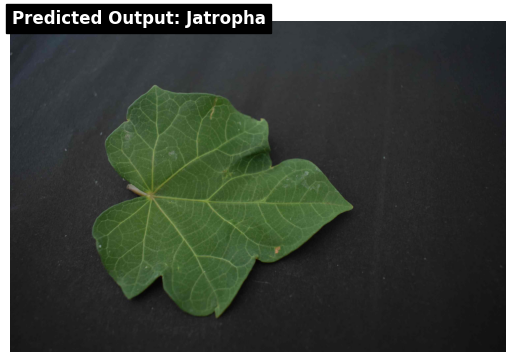

In [11]:
path=r"testimages\0018_0036.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=xgb_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output: {output_name}', color='white', fontsize=12, weight='bold',backgroundcolor='black')
plt.axis('off')
plt.show()

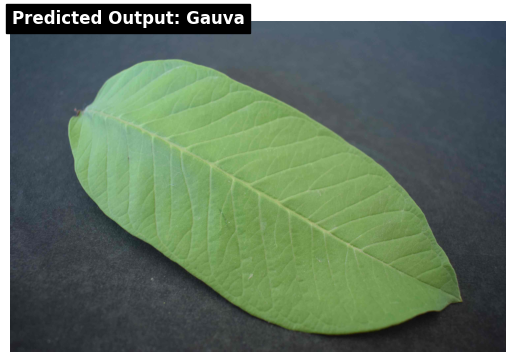

In [12]:
path=r"testimages\0004_0251.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=xgb_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output: {output_name}', color='white', fontsize=12, weight='bold',backgroundcolor='black')
plt.axis('off')
plt.show()

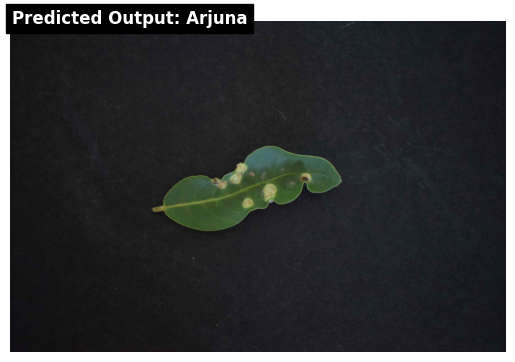

In [13]:
path=r"testimages\0013_0026.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=xgb_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output: {output_name}', color='white', fontsize=12, weight='bold',backgroundcolor='black')
plt.axis('off')
plt.show()

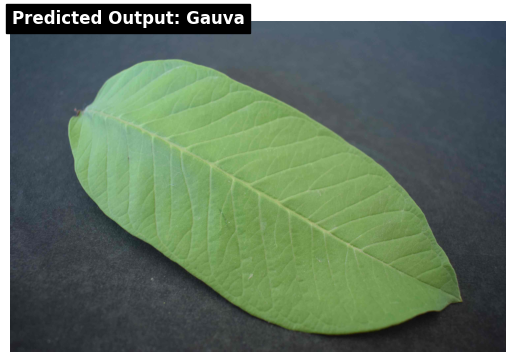

In [14]:
path=r"testimages\0004_0251.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=xgb_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output: {output_name}',color='white', fontsize=12, weight='bold',backgroundcolor='black')
plt.axis('off')
plt.show()

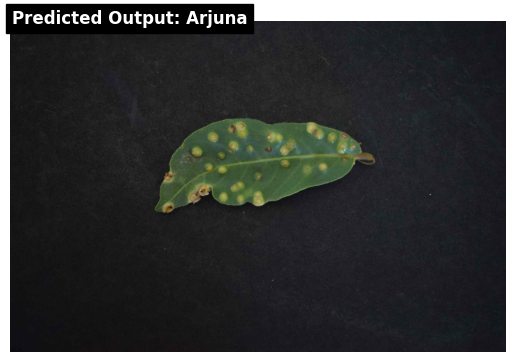

In [15]:
path=r"testimages\0013_0025.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=xgb_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output: {output_name}', color='white', fontsize=12, weight='bold',backgroundcolor='black')
plt.axis('off')
plt.show()

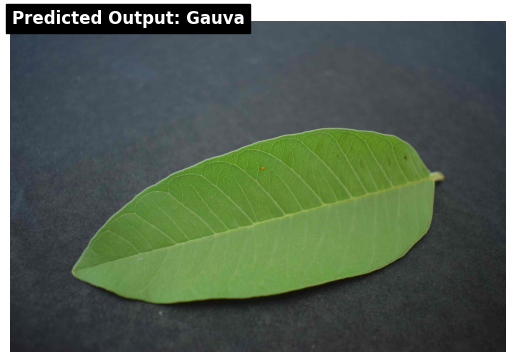

In [16]:
path=r"testimages\0004_0229.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=xgb_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output: {output_name}', color='white', fontsize=12, weight='bold',backgroundcolor='black')
plt.axis('off')
plt.show()